In [1]:
import pandas as pd
import numpy as np
import string
import emoji
import emojis
from string import punctuation
from collections import Counter
import re


In [2]:
import os 
os.chdir('D:\\dataset\\new_data')
os.getcwd()

'D:\\dataset\\new_data'

In [3]:
spcolumn = ["comments", "likes", "label", "Bsentiment", "Related_to_post"]
#corpus = pd.read_csv("added data new 500.csv", usecols=spcolumn)
corpus = pd.read_csv("data_preprocessing_file.csv", usecols=spcolumn)

corpus["comments"]= corpus['comments'].astype(str)
corpus.head()

,comments,likes,label,Bsentiment,Related_to_post
0,vaiar mto neta bangladesher sob jelay thakle d...,2,Neutral,Normal_comment,1.0
1,sabash ostad ! Bangldesh tomake chay imraner mto,0,Nonbullying,Supportive,1.0
2,mashrafi vai k allah rohomot korun,0,Neutral,Normal_comment,1.0
3,ai manush ta k prodhanmontri howar shujug dewa...,0,Neutral,Normal_comment,1.0
4,ekta neta emon howa dorkar . mashrafi neta how...,0,Neutral,Normal_comment,1.0


Total Comments:102 
Nonbullying    69
Neutral        24
Bullying        9
Name: label, dtype: int64
Normal_comment    44
Supportive        35
Happy             11
Aggressive         8
Sad                4
Name: Bsentiment, dtype: int64


<AxesSubplot:>

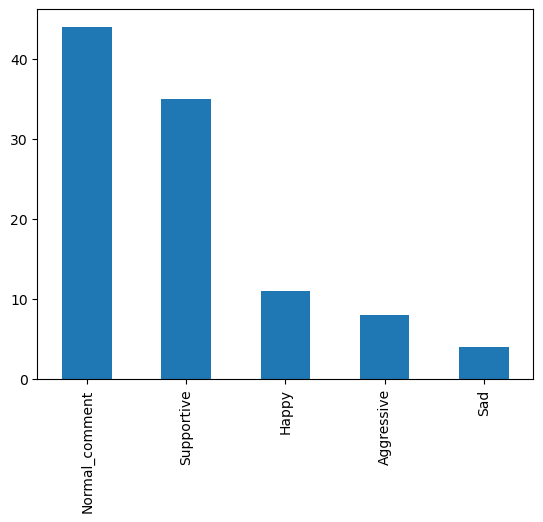

In [4]:
print ("Total Comments:{} ".format(len(corpus)))
print(corpus['label'].value_counts())
print(corpus['Bsentiment'].value_counts())
corpus['Bsentiment'].value_counts().plot.bar()

In [5]:
spcolumn = ["comments", "likes", "label", "Bsentiment", "Related_to_post"]
corpus2 = pd.read_csv("cyber_comment_train.csv", usecols=spcolumn)
corpus2["comments"]= corpus2['comments'].astype(str)


1247
NonBullying    558
Bullying       497
Neutral        192
Name: label, dtype: int64
sexually_abusive       261
supportive             247
normal_comment         246
aggressive             171
sad                    134
happy                   91
religiously_abusive     68
meaningless             29
Name: Bsentiment, dtype: int64


<AxesSubplot:>

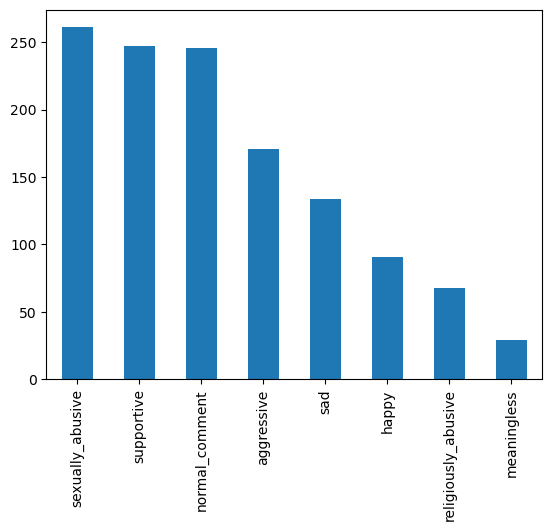

In [6]:
print (len(corpus2))
print(corpus2['label'].value_counts())
print(corpus2['Bsentiment'].value_counts())
corpus2['Bsentiment'].value_counts().plot.bar()


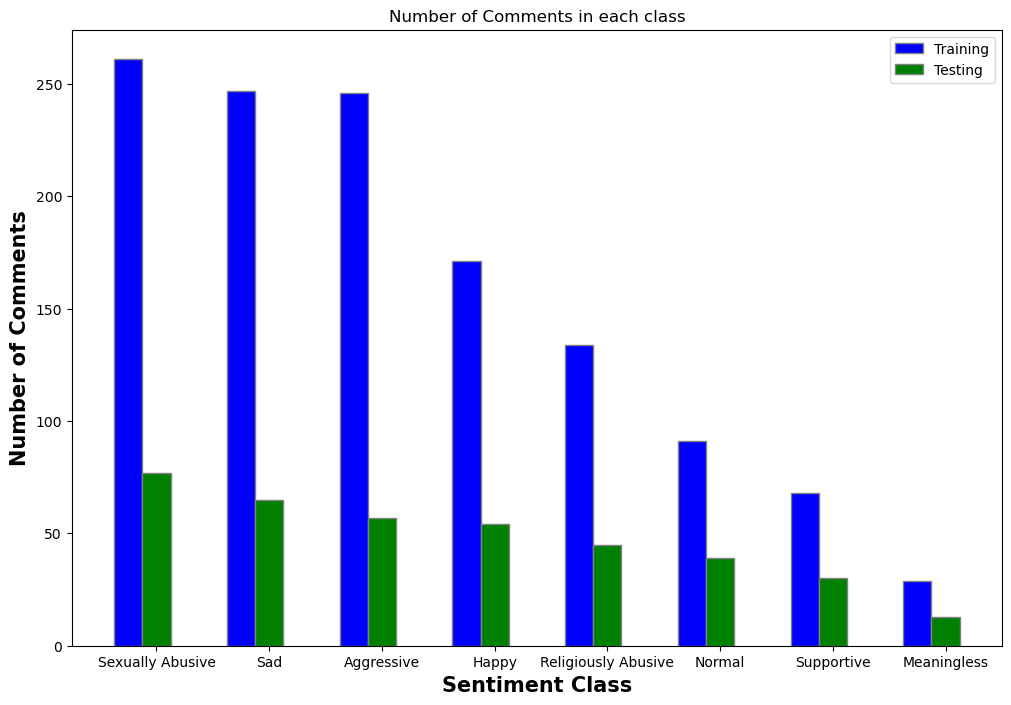

In [7]:

import numpy as np 
import matplotlib.pyplot as plt 
  

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
    
X = ['Sexually Abusive','Sad','Aggressive','Happy','Religiously Abusive','Normal', 'Supportive', 'Meaningless']
Ytraining = [261, 247, 246, 171,134,91,68,29]
Ztesting = [77, 65, 57, 54, 45,39,30,13]
  
X_axis = np.arange(len(X))

br1 = np.arange(len(Ytraining))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Ytraining, color ='b', width = barWidth,
        edgecolor ='grey', label ='Training')
plt.bar(br2, Ztesting, color ='g', width = barWidth,
        edgecolor ='grey', label ='Testing')

  
plt.xticks([r + barWidth for r in range(len(Ytraining ))], X)
 
plt.xlabel("Sentiment Class", fontweight ='bold', fontsize = 15)
plt.ylabel("Number of Comments", fontweight ='bold', fontsize = 15)
plt.title("Number of Comments in each class")

plt.legend()
plt.show()

In [8]:
#data preprocessing
def data_preprocessing(comment):
    comment_lower = str(comment.lower())
    url = re.compile(r'https?://\S+|www.\\S+')
    comment_extract_url = url.sub(r'', comment_lower)
    return comment_extract_url                

#emoji count
def emoji_count(comment):
    emo = emojis.count(comment)
    return emo


#punctuation count
def punctuation_number(comment):
    punctuation_counts = 0
    for i in comment:
        if i in string.punctuation:
            punctuation_counts = punctuation_counts+1
    return punctuation_counts


#remove puctuation
def remove_punc(comments):
    comment = str(comments)
    punctuations = '''()-[]{};:"',<>./?@#$%^*_~\n\r'''
    no_punc = ""
    for char in comment:
        if char not in punctuations:
            no_punc=no_punc+char
    return no_punc


In [9]:
corpus['url_extract'] = corpus['comments'].apply(lambda comment:data_preprocessing(comment))
corpus['punc_number'] = corpus['url_extract'].apply(lambda comment: punctuation_number(comment))
corpus['emoji_number'] = corpus['comments'].apply(lambda comment:emoji_count(comment))
corpus['process_comments'] = corpus['url_extract'].apply(lambda comment: remove_punc(comment))

In [10]:
corpus.loc[[28]]


,comments,likes,label,Bsentiment,Related_to_post,url_extract,punc_number,emoji_number,process_comments
28,borka gayer mohilar ovhinoy ta darun hoiche,28,Nonbullying,Supportive,1.0,borka gayer mohilar ovhinoy ta darun hoiche,0,0,borka gayer mohilar ovhinoy ta darun hoiche


In [11]:
#spelling correction from comment with emo, 
#from corpus['url_extracted']
#will use it for vader sentiment analyze
def dictionary():
    myfile = open ("bangla spelling correction dectionary.txt") 
    d = { } 
    for line in myfile: 
        x = line.strip().split("\t") 
        key, values = x[0], x[2:] 
        d.setdefault(key, []).extend(values)
    return d


# def splell_correction(comment):
    
dictionary_tb= dictionary()
listOfItems = list(dictionary_tb.items())

#creat a list of the dictionary values
dictt_values=list(dictionary_tb.values())
listn=[]
for i in range (len(dictt_values)):
    for j in range (len(dictt_values[i])):
        listn.append(dictt_values[i][j])
        
def find_in_list(word):
    if word in listn:
        return True
    else:
        return False

def getKeysByValue(valueToFind):
    z=find_in_list(valueToFind)
    if z== True:
        for item  in listOfItems:
            for items in item:
                for i in range (len(items)):
                    if items[i] == valueToFind:
                        return item[0]
    else:
        return valueToFind
                              
                
        
           
def pass_comment(comments):
    comment= comments
    for word in comment:
        word=str(word)
        listOfKeys = str(getKeysByValue(word))
        for i in range(len(comment)):
            if comment[i]==word:
                comment[i]=listOfKeys
    return ' '.join(map(str, comment))      #map(function, iteration)
    #print (comment)



    
        
# comment='Nick doctor magi'
# words = comment.strip().split(" ")
# print(words)
# pass_comment(words)

corpus['token1']=(corpus['process_comments'].apply(lambda comment: comment.strip().split(" ")))
corpus['spell_correct_with_emo'] = corpus['token1'].apply(lambda comment: pass_comment(comment))

print(corpus.spell_correct_with_emo)


0      vaiar mto neta bangladesher sob jelay thakle d...
1       sabash ostad ! bangldesh tomake chay imraner mto
2                     mashrafi vai k allah rohomot korun
3      ai manush ta k prodhanmontri howar shujug dewa...
4      ekta neta emon howa dorkar  mashrafi neta howa...
                             ...                        
97     vai vul apnk ke dhorte boleseata vul naancholi...
98                     তুমি কি হেতো পারো।তুমার বুল অয় না
99     sotti bolti oni lekha pora kora naiuneducated man
100    ak ta manos jokhon valo kaj kora sata bad deya...
101             oi sumondhi  tui paris je ato vul dhoris
Name: spell_correct_with_emo, Length: 102, dtype: object


In [12]:
corpus.loc[[28]]

,comments,likes,label,Bsentiment,Related_to_post,url_extract,punc_number,emoji_number,process_comments,token1,spell_correct_with_emo
28,borka gayer mohilar ovhinoy ta darun hoiche,28,Nonbullying,Supportive,1.0,borka gayer mohilar ovhinoy ta darun hoiche,0,0,borka gayer mohilar ovhinoy ta darun hoiche,"[borka, gayer, mohilar, ovhinoy, ta, darun, ho...",borka gayer mohilar ovhinoy ta darun hoiche


In [13]:
corpus['process_comments']=corpus['process_comments'].astype(str)
def remove_emoji(comment):
                                                        #return emoji.demojize(comment) #convert emoji to text
    return emoji.replace_emoji(comment, replace='') 

corpus["spell_correct_without_emo"]= corpus['spell_correct_with_emo'].apply(lambda comment: remove_emoji(comment))
corpus.loc[[1]]


,comments,likes,label,Bsentiment,Related_to_post,url_extract,punc_number,emoji_number,process_comments,token1,spell_correct_with_emo,spell_correct_without_emo
1,sabash ostad ! Bangldesh tomake chay imraner mto,0,Nonbullying,Supportive,1.0,sabash ostad ! bangldesh tomake chay imraner mto,1,0,sabash ostad ! bangldesh tomake chay imraner mto,"[sabash, ostad, !, bangldesh, tomake, chay, im...",sabash ostad ! bangldesh tomake chay imraner mto,sabash ostad ! bangldesh tomake chay imraner mto


In [14]:
#covert abusive word text file to list 
with open('bengali swear word.txt','r',encoding="utf8") as f:
    listabusive=[]
    for line in f:
        strip_lines=line.strip()
        listli=strip_lines.split("\t")

        for i in range (len(listli)):
            m=listabusive.append(listli[i])

    listabusiveSet = set(listabusive)
    

#count abusive word            
def abusive_word_number(comment):
    comment = comment.strip()  #remove leading and ending whitespace
    comment=re.sub(' +', ' ',  comment)  #replace multiple whitespace
    comment=comment.split(' ') #convert string to list 
    
    save=[]
    for w in listabusiveSet:
        for word in comment:
            if w==word:
                save.append(word)
    return len(save)


corpus['abusive_word_number']=corpus['spell_correct_without_emo'].apply(lambda comment: abusive_word_number(comment))
print(corpus.abusive_word_number)

0      0
1      0
2      0
3      0
4      0
      ..
97     0
98     0
99     0
100    0
101    0
Name: abusive_word_number, Length: 102, dtype: int64


In [15]:


with open('bengali positive word.txt','r', encoding="utf8") as f:
    listPositive=[]
    for line in f:
        strip_lines=line.strip()
        listlp=strip_lines.split("\t")

        for i in range (len(listlp)):
            m=listPositive.append(listlp[i])
    listPositiveSet = set (listPositive)
    
#count positive word            
def positive_word_number(comment):
    comment = comment.strip()  #remove leading and ending whitespace
    comment=re.sub(' +', ' ',  comment)  #replace multiple whitespace
    comment=comment.split(' ') #convert string to list 
    save=[]
    for w in listPositiveSet:
        for word in comment:
            if w==word:
                save.append(word)
    return len(save)

corpus['positive_word_number']=corpus['spell_correct_with_emo'].apply(lambda comment: positive_word_number(comment))
print(corpus.positive_word_number)

0      0
1      0
2      0
3      0
4      0
      ..
97     1
98     0
99     0
100    1
101    0
Name: positive_word_number, Length: 102, dtype: int64


In [16]:
columns_name=['comments','process_comments','spell_correct_with_emo','spell_correct_without_emo','likes','Related_to_post','punc_number','emoji_number','abusive_word_number', 'positive_word_number', 'Bsentiment','label']
corpus.to_csv('add_new_500_2.csv', index=False, columns=columns_name)